In [128]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python')
from measurements import *

plotter = Plotter()

from fitv2 import *


import h5py


from scipy.optimize import curve_fit
from scipy.integrate import quad

from scipy.interpolate import interp1d
from scipy.optimize import minimize 


processedDataDir = "../data/processedv4/"
#processedDataDir = "../python/"

gdir = '../gnuplot_data/'

%load_ext gnuplot_kernel


dt=0.72
chi0 = 5.0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The gnuplot_kernel extension is already loaded. To reload it, use:
  %reload_ext gnuplot_kernel


# Broken phase

In [3]:
dataminus = ConfResults(fn="../data/zminus2_N080_m-0499128_h003000_c00500.h5",thTime=1000,dt=dt, data_format="new", processedDir=processedDataDir, plotDir=gdir)

In [14]:
dataminus.load("OtOttp","A", direc=processedDataDir)
dataminus.load("OtOttp_blocks","A", direc=processedDataDir)
dataminus.load("OtOttp","dsigma", direc=processedDataDir)
dataminus.load("OtOttp_blocks","dsigma", direc=processedDataDir)
dataminus.load("OtOttp","phi", direc=processedDataDir)
dataminus.load("OtOttp_blocks","phi", direc=processedDataDir)

## Time correlator

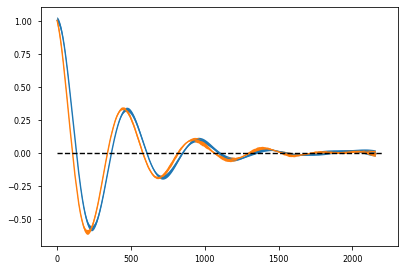

In [18]:
plotter.plot(dataminus,"OtOttp","A",tMax = 3000, yfact = 1.0 / 5.0)
plotter.plot(dataminus,"OtOttp","phi",tMax = 3000, yfact = 1.0 / np.real(dataminus.OtOttp['phi'].mean[0]))
#plotter.plot(dataminus,"OtOttp","dsigma",tMax = 2200, yfact = 1.0 / np.real(dataminus.OtOttp['dsigma'].mean[0]))
plt.plot([0,2200],[0,0],'--k')

In [11]:
dataminus.save("OtOttp","A", fmt = "gnuplot", yfact = 1.0 / chi0)
dataminus.save("OtOttp","phi", fmt = "gnuplot", yfact = 1.0 / dataminus.OtOttp['phi'].mean[0])
dataminus.save("OtOttp","dsigma", fmt = "gnuplot", yfact = 1.0 / dataminus.OtOttp['dsigma'].mean[0])

## Statistical correlator

In [17]:
dataminus.computeStatisticalCor('A', omMax=0.2, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)),  myTmax=20000.0, filterFunc=lambda x : np.exp(-x**2 /1800.0**2))

/Users/adrien/miniconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:665: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


In [18]:
dataminus.computeStatisticalCor('phi', omMax=0.2, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)),  myTmax=20000.0, filterFunc=lambda x : np.exp(-x**2 /1800.0**2))

In [209]:
dataminus.computeStatisticalCor('dsigma', omMax=0.5, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)),  myTmax=20000.0, filterFunc=lambda x : np.exp(-x**2 /600.0**2))

/Users/adrien/miniconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:665: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


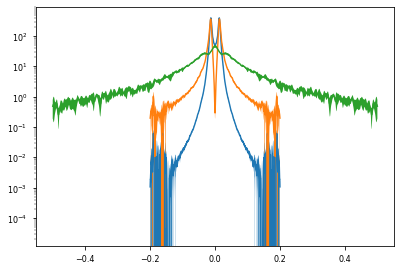

In [210]:
plotter.plot(dataminus, "OtOttpFourier", "A",  yfact = 1.0 / chi0)
plotter.plot(dataminus, "OtOttpFourier", "phi",  yfact = 1.0 / np.real(dataminus.OtOttp['phi'].mean[0]))
plotter.plot(dataminus, "OtOttpFourier", "dsigma",  yfact = 1.0 / np.real(dataminus.OtOttp['dsigma'].mean[0]))

plt.yscale('log')

In [211]:
dataminus.save("OtOttpFourier","A", fmt = "gnuplot", yfact = 1.0 / chi0)
dataminus.save("OtOttpFourier","phi", fmt = "gnuplot", yfact = 1.0 / dataminus.OtOttp['phi'].mean[0])
dataminus.save("OtOttpFourier","dsigma", fmt = "gnuplot", yfact = 1.0 / dataminus.OtOttp['dsigma'].mean[0])

### Fits

In [153]:
fitminus=Fitter(dataminus, chi0 = chi0, chiperp = np.real(dataminus.OtOttp['phi'].mean[0]), L=80)


In [155]:
fitminus.setParValues("OtOttpFourier", "Aphi", [0.014,0.005])

fitminus.fit("OtOttpFourier", "Aphi")
fitminus.averagechi2reduce

{'OtOttpFourier': {'Aphi': 1.8460992935170222},
 'propagatorF': {},
 'propagator': {}}

[0.013521809143883567, 0.0048058526718381955]


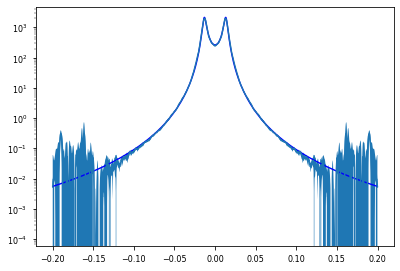

In [156]:
fitminus.setParValues("OtOttpFourier", "phi", fitminus.par["OtOttpFourier"]["Aphi"])
fitminus.setParValues("OtOttpFourier", "A", fitminus.par["OtOttpFourier"]["Aphi"])
fitminus.plot("OtOttpFourier","A")
plotter.plot(dataminus, "OtOttpFourier", "A")
plt.yscale('log')


[0.013521809143883567, 0.0048058526718381955]


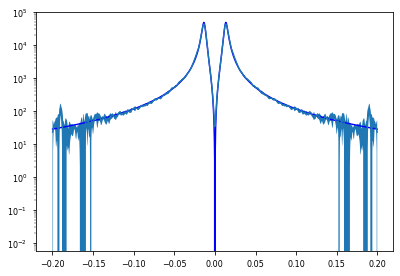

In [157]:
fitminus.plot("OtOttpFourier","phi")
plotter.plot(dataminus, "OtOttpFourier", "phi")
plt.yscale('log')


In [158]:
print(fitminus.par)
print(fitminus.parErr)
print(fitminus.averagechi2reduce)

{'OtOttpFourier': {'A': [0.013521809143883567, 0.0048058526718381955], 'phi': [0.013521809143883567, 0.0048058526718381955], 'dphi': array([0., 0.]), 'Aphi': [0.013521809143883567, 0.0048058526718381955]}, 'propagatorF': {'phi': array([0., 0.]), 'dsigma': array([0., 0.])}, 'propagator': {'phi': array([0., 0.])}}
{'OtOttpFourier': {'Aphi': array([4.50623905e-06, 4.41330218e-06])}, 'propagatorF': {}, 'propagator': {}}
{'OtOttpFourier': {'Aphi': 1.8460992935170222}, 'propagatorF': {}, 'propagator': {}}


## Static correlator and $f^2$, $m^2$, $\langle\phi_0\rangle$

In [8]:
#dataminus.load("propagator", "phi", direc=processedDataDir)
dataminus.load("propagator_raw","phi",direc=processedDataDir)

In [9]:
dataminus.computePropagator("phi", lambda x : jackknife(x,10), 100, True)

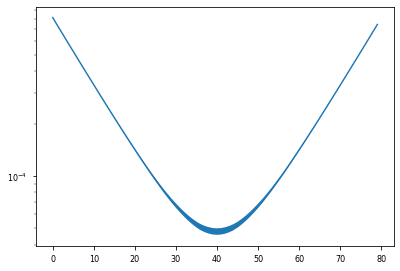

In [10]:
plotter.plot(dataminus,"propagator", "phi")
plt.yscale('log')

[1.107581708631992, 0.0881235294639422]


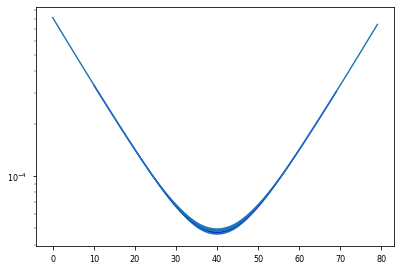

In [113]:
fitminus.setParValues("propagator", "phi", [1,0.1])
fitminus.fit("propagator", "phi",minInd = 10, maxInd = -10)
fitminus.plot("propagator", "phi")
plotter.plot(dataminus,"propagator", "phi", yfact=1)
#plt.ylim([0.1,60])
plt.yscale('log')

In [6]:
dataminus.computeMean("phi0", lambda x, func : jackknife(x,nSamples = 10, func=func), decim = 100)

In [7]:
print(dataminus.meanValues['phi0'].mean)
print(dataminus.meanValues['phi0'].err)

0.3490729610469091
[2.91125837e-05]


Below are the values obtained by taking 5 blocks, no decimation. Pretty consistent!

In [196]:
#print(dataminus.meanValues['phi0'].mean)
#print(dataminus.meanValues['phi0'].err)

0.3490699025357364
3.248147898780166e-05


In [28]:
fitminus.par

{'OtOttpFourier': {'A': array([0., 0.]),
  'phi': array([0., 0.]),
  'dphi': array([0., 0.]),
  'Aphi': [0.013521809143883567, 0.0048058526718381955]},
 'propagatorF': {'phi': array([0., 0.]), 'dsigma': array([0., 0.])},
 'propagator': {'phi': [1.107581708631992, 0.0881235294639422]}}

In [29]:
fitminus.parErr

{'OtOttpFourier': {'Aphi': array([4.50623905e-06, 4.41330218e-06])},
 'propagatorF': {},
 'propagator': {'phi': array([0.00706595, 0.00022846])}}

In [114]:
fitminus.averagechi2reduce

{'OtOttpFourier': {'Aphi': 1.8460992935170222},
 'propagatorF': {},
 'propagator': {'phi': 0.030053033711083692}}

In [115]:
dataminus.save("propagator","phi", fmt = "gnuplot", yfact = 1.0)

In [56]:
res = []
resErr = []
maxInd = 30
for ind in range(maxInd):
    fitminus.setParValues("propagator", "phi", [1,0.1])
    fitminus.fit("propagator", "phi",minInd = ind, maxInd = 80-ind)
    res.append(fitminus.par['propagator']['phi'])    
    resErr.append(fitminus.parErr['propagator']['phi'])
res=np.asarray(res)
resErr=np.asarray(resErr)


<ErrorbarContainer object of 3 artists>

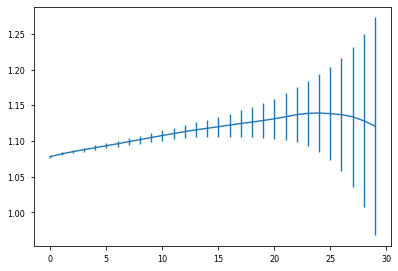

In [57]:
plt.errorbar(np.arange(maxInd),res[:,0],resErr[:,0])

<ErrorbarContainer object of 3 artists>

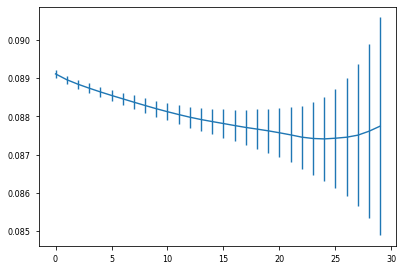

In [58]:
plt.errorbar(np.arange(maxInd),res[:,1],resErr[:,1])

In [104]:
plateau = 14

modelC = lambda par : par[0]
chi2C1 = lambda par : np.sum(np.square((res[plateau:,0] - modelC(par)) / resErr[plateau:,0] ))
fitC1 = Minuit(chi2C1, [1.10], name=["b"])

fitC1.errordef = Minuit.LEAST_SQUARES

#fit.limits = []

fitC1.migrad()
fitC1.minos()

chi2C2 = lambda par : np.sum(np.square((res[plateau:,1] - modelC(par)) / resErr[plateau:,1] ))
fitC2 = Minuit(chi2C2, [1.10], name=["b"])

fitC2.errordef = Minuit.LEAST_SQUARES

#fit.limits = []

fitC2.migrad()
fitC2.minos();


In [105]:
fitC1

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 0.9368                     │              Nfcn = 15               │
│ EDM = 2.67e-19 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b    │   1.124   │   0.006   │   -0.006   │   0.006    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │           b           │
├──────────┼───────────┬───────────┤
│  Error   │  -0.006   │   0.006   │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌───┬──────────┐
│   │        b │
├───┼──────────┤
│ b │ 3.74e-05 │
└───┴──────────┘

In [106]:
fitC2

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 0.8045                     │              Nfcn = 17               │
│ EDM = 1.28e-12 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b    │ 87.71e-3  │  0.15e-3  │  -0.15e-3  │  0.15e-3   │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │           b           │
├──────────┼───────────┬───────────┤
│  Error   │ -0.15e-3  │  0.15e-3  │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌───┬──────────┐
│   │        b │
├───┼──────────┤
│ b │ 2.33e-08 │
└───┴──────────┘

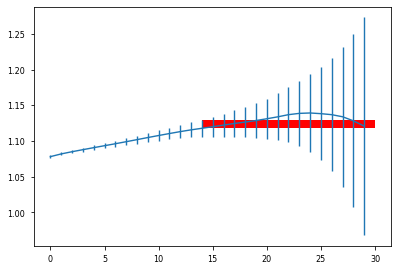

In [107]:
plt.errorbar(np.arange(maxInd),res[:,0],resErr[:,0])

xs = [plateau,maxInd]
ys = np.asarray([fitC1.values['b'],fitC1.values['b']])
errs = np.asarray([fitC1.errors['b'],fitC1.errors['b']])

plt.fill_between(xs, ys - errs,ys + errs, linewidth=0, zorder=1, color='r')


In [116]:
np.savetxt(gdir + "f2_from_propagator.txt", np.column_stack([
                np.arange(maxInd),
                res[:,0],
                resErr[:,0]
            ]))

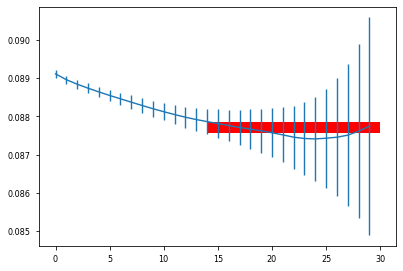

In [108]:
plt.errorbar(np.arange(maxInd),res[:,1],resErr[:,1])

xs = [plateau,maxInd]
ys = np.asarray([fitC2.values['b'],fitC2.values['b']])
errs = np.asarray([fitC2.errors['b'],fitC2.errors['b']])

plt.fill_between(xs, ys - errs,ys + errs, linewidth=0, zorder=1, color='r')


In [117]:
np.savetxt(gdir + "m2_from_propagator.txt", np.column_stack([
                np.arange(maxInd),
                res[:,1],
                resErr[:,1]
            ]))

## Results, summary


$$
\begin{array}{|c|c|}
\hline 
& \bf\text{ Simulation parameters}\\
\hline
T & -4.99128  \\
\hline
H & 0.003\\
\hline
z & -2.2011\\
\hline
\chi_0 & 5\\
\hline
\lambda & 4\\
\hline
D & 1/3\\
\hline
\end{array}
$$ 

$$
\begin{array}{|c|c|}
\hline 
& \bf\text{ Dynamic fit}\\
\hline
m_p & 0.013521\pm 0.00005  \\
\hline
\Gamma_p & 0.004806\pm 0.00004\\
\hline
\chi^2_{per\ dof} &  1.85 \\
\hline
\end{array}
$$ 

$$
\begin{array}{|c|c|}
\hline 
& \bf \text{Magnetization} \\
\hline
\langle \phi_0 \rangle & 0.34906\pm 0.00003\\
\hline
\end{array}
$$ 


$$
\begin{array}{|c|c|}
\hline 
& \bf \text{Static fit} \\
\hline
\frac{f^2}{\sigma^2} & 1.124 \pm 0.006\\
\hline
m & 0.0877 \pm 0.0002\\
\hline
%\chi^2_{per\ dof} &  0.05 \\
%\hline
\end{array}
$$ 

For the static quantity, we "prune" the data with a frequency of $100$. Then we estimate the errors using jackknife. This gives stables errorbars and of the same size than bootstrap. We then extract the static values from the plateau's (starting the fit at larger and larger distances); this allows us to get rid of higher states.

$\frac{f^2 m^2}{\sigma^2} = \frac{H}{\sigma}$ is verified : 

In [112]:
1.124 * 0.0877**2

0.00864500996

In [110]:
0.003 / 0.34907

0.008594264760649726

Gell Mann Oaks Renner mass

In [180]:
(0.003 * 0.34907 / 5)**0.5

0.014472111110684577

# Unbroken phase

In [119]:
dataplus = ConfResults(fn="../data/zplus_N080_m-0449406_h003000_c00500.h5",thTime=10000,dt=dt, data_format="new", processedDir=processedDataDir, plotDir=gdir)

In [120]:
dataplus.load("OtOttp","A", direc=processedDataDir)
dataplus.load("OtOttp_blocks","A", direc=processedDataDir)
dataplus.load("OtOttp","phi", direc=processedDataDir)
dataplus.load("OtOttp_blocks","phi", direc=processedDataDir)
dataplus.load("OtOttp","dsigma", direc=processedDataDir)
dataplus.load("OtOttp_blocks","dsigma", direc=processedDataDir)


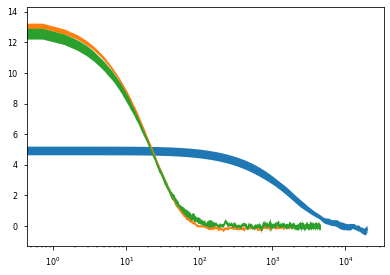

In [214]:
plotter.plot(dataplus,"OtOttp","A")
plotter.plot(dataplus,"OtOttp","phi")
plotter.plot(dataplus,"OtOttp","dsigma")
plt.xscale('log')

In [125]:
dataplus.computeStatisticalCor('A', omMax=0.1, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)),  myTmax=20000.0, filterFunc=lambda x : np.exp(-x**2 / 8000.0**2))


/Users/adrien/miniconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:665: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


In [101]:
dataplus.computeStatisticalCor('dsigma', omMax=0.5, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)),  myTmax=20000.0, filterFunc=lambda x : np.exp(-x**2 / 200.0**2))
dataplus.computeStatisticalCor('phi', omMax=0.5, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)),  myTmax=20000.0, filterFunc=lambda x : np.exp(-x**2 / 200.0**2))

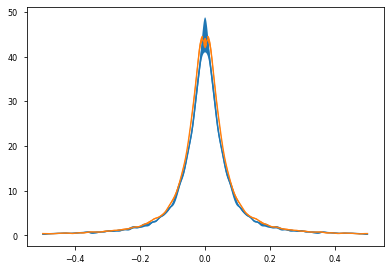

In [105]:
plotter.plot(dataplus,"OtOttpFourier","dsigma", yfact = 1.0 / np.real(dataplus.OtOttp['phi'].mean[0]))
plotter.plot(dataplus,"OtOttpFourier","phi", yfact = 1.0 / np.real(dataplus.OtOttp['dsigma'].mean[0]))

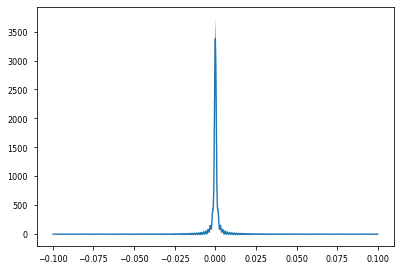

In [126]:
plotter.plot(dataplus,"OtOttpFourier","A", yfact = 1.0 / chi0 )

In [215]:
dataplus.save("OtOttp","A", fmt="gnuplot", yfact = 1.0 / chi0)
dataplus.save("OtOttp","phi", fmt="gnuplot", yfact = 1.0 / dataplus.OtOttp['phi'].mean[0])
dataplus.save("OtOttp","dsigma", fmt="gnuplot", yfact = 1.0 / dataplus.OtOttp['dsigma'].mean[0])
dataplus.save("OtOttpFourier","A", fmt="gnuplot", yfact = 1.0 / chi0)
dataplus.save("OtOttpFourier","phi", fmt="gnuplot", yfact = 1.0 / dataplus.OtOttp['phi'].mean[0])
dataplus.save("OtOttpFourier","dsigma", fmt="gnuplot", yfact = 1.0 / dataplus.OtOttp['dsigma'].mean[0])

In [127]:
dataplus.save("OtOttpFourier","A", fmt="gnuplot", yfact = 1.0 / chi0)


## Summary of simulation 

$$
\begin{array}{|c|c|}
\hline 
& \bf\text{ Simulation parameters}\\
\hline
T & 4.49406  \\
\hline
H & 0.003\\
\hline
z & 3.86978\\
\hline
\chi_0 & 5\\
\hline
\lambda & 4\\
\hline
D & 1/3\\
\hline
\end{array}
$$ 

# Critical line

In [171]:
data=dict()
data["h0002"] = ConfResults(fn="../data/zcritical_N080_m-0481100_h002000_c00500.h5",thTime=1000,dt=dt, data_format="new", processedDir=processedDataDir, plotDir=gdir)
data["h0003"] = ConfResults(fn="../data/zcritical_N080_m-0481100_h003000_c00500.h5",thTime=1000,dt=dt, data_format="new", processedDir=processedDataDir, plotDir=gdir)
data["h0004"] = ConfResults(fn="../data/zcritical_N080_m-0481100_h004000_c00500.h5",thTime=1000,dt=dt, data_format="new", processedDir=processedDataDir, plotDir=gdir)
data["h0006"] = ConfResults(fn="../data/zcritical_N080_m-0481100_h006000_c00500.h5",thTime=1000,dt=dt, data_format="new", processedDir=processedDataDir, plotDir=gdir)
data["h001"] = ConfResults(fn="../data/zcritical_N080_m-0481100_h010000_c00500.h5",thTime=1000,dt=dt, data_format="new", processedDir=processedDataDir, plotDir=gdir)

hkeys = ["h0002", "h0003", "h0004", "h0006", "h001"]

hs = dict()
hs["h0002"] = 0.002
hs["h0003"] = 0.003
hs["h0004"] = 0.004
hs["h0006"] = 0.006
hs["h001"] = 0.01

massCutoffs = dict()
massCutoffs["h0002"] = 3000.0
massCutoffs["h0003"] = 2500.0
massCutoffs["h0004"] = 2000.0
massCutoffs["h0006"] = 1300.0
massCutoffs["h001"] = 900.0 # set a posteriori to improve the fourier transform.


In [174]:
nuc = 0.402432
z_exp = 1.47 #mean
#z= 1.5
#z = 1.455#1.50 #mean -sigma, best by eye.
-nuc * z_exp

def rescaling(h, href):
    return (h/href)**(-nuc * z_exp)

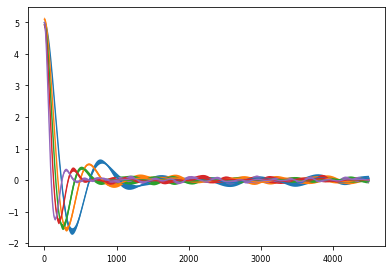

In [176]:
for h in hkeys[:]:
    data[h].load("OtOttp","A")
    data[h].load("OtOttp_blocks","A")

    plotter.plot(data[h],"OtOttp","A")
    #plt.yscale('log')
plt.show()

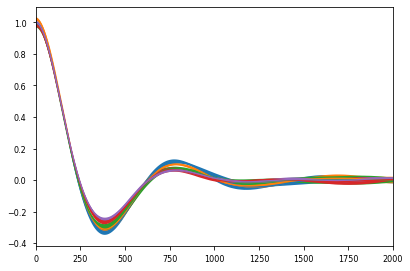

In [180]:
for k in hkeys[:]:
    plotter.plot(data[k],"OtOttp","A", xfact= 1.0 / rescaling(hs[k],0.002), yfact = 1.0 / chi0)
    data[k].save("OtOttp","A", fmt = "gnuplot", tag = "_rescaled", xfact = 1.0 / rescaling(hs[k],0.002),  yfact = 1.0 / chi0)
    data[k].save("OtOttp","A", fmt = "gnuplot",  yfact = 1.0 / chi0)
plt.xlim([0,2000])

plt.show()

/Users/adrien/miniconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:665: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],
/Users/adrien/miniconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:665: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],
/Users/adrien/miniconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:665: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],
/Users/adrien/miniconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:665: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],
/Users/adrien/miniconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:665: ComplexWarning: Casting comp

(0.0, 0.03)

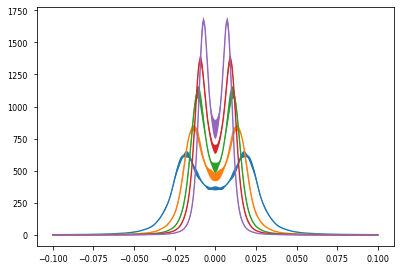

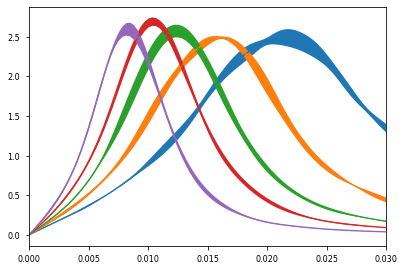

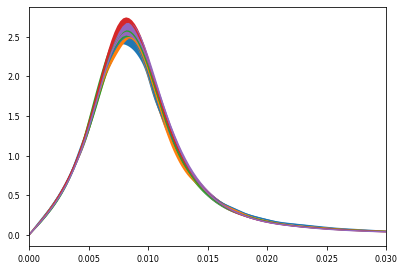

In [204]:
plt.figure(1)
for k in hkeys[::-1][:]:
    data[k].computeStatisticalCor('A', omMax=0.1, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)), filterFunc=lambda x : np.exp(-x**2 / massCutoffs[h]**2), myTmax = 20000.0)
    plotter.plot(data[k],"OtOttpFourier","A")
plt.figure(2)

for k in hkeys[::-1][:]:
    plotter.plot(data[k],"OtOttpFourier","A", yfact = np.abs(data[k].OtOttpFourier_oms["A"]) / chi0)
    data[k].save("OtOttpFourier","A", fmt = "gnuplot",  yfact = 1.0 / chi0)
    data[k].save("OtOttpFourier","A", yfact = np.abs(data[k].OtOttpFourier_oms["A"])/chi0, fmt = "gnuplot", tag = "_spectral")
   # plt.errorbar(data[k].OtOttpFourier_oms["A"], np.abs(data[k].OtOttpFourier_oms["A"]) * data[k].OtOttpFourier["A"].mean, np.abs(data[k].OtOttpFourier_oms["A"]) * data[k].OtOttpFourier["A"].err)
plt.xlim([0,0.03])


plt.figure(3)
for k in hkeys[::-1][:]:
    plotter.plot(data[k],"OtOttpFourier","A", xfact = rescaling(hs[k], 0.002) , yfact = np.abs(data[k].OtOttpFourier_oms["A"])/chi0)
    data[k].save("OtOttpFourier","A", xfact = rescaling(hs[k], 0.002) , yfact = np.abs(data[k].OtOttpFourier_oms["A"])/chi0, fmt = "gnuplot", tag = "_spectral_rescaled")

plt.xlim([0,0.03])

In [114]:
def getRescalingFromMinimum(x, data1, data2):
    min1 = findMin(x,data1)#x[np.argmin(data1)]
    min2 = findMin(x,data2)#x[np.argmin(data2)]
    return min2 / min1

In [124]:
%%time
resc = []
hr = []

mMax = 1200
for j in range(0,len(hkeys)):
    for h in hkeys[j+1:]:
        test = []
        for i in range(len(data[hkeys[j]].OtOttp_blocks["A"])):
            for kk in range(len(data[h].OtOttp_blocks["A"])):
                print ("j={}, href={}, h={}. i={}, k={}".format(j,hkeys[j],h,i,kk), end="\r")
                test.append(getRescalingFromMinimum(data[hkeys[j]].OtOttp_time["A"][:mMax], data[hkeys[j]].OtOttp_blocks["A"][kk][:mMax], data[h].OtOttp_blocks["A"][i][:mMax]))
        resc.append((np.mean(test, axis = 0),np.std(test, axis = 0)))
        #resc.append(bootstrap(test, 100))
        hr.append(hs[hkeys[j]]/ hs[h])
        
stop = None
htofit = np.asarray(hr)[:stop]
rescMean =np.asarray(resc)[:stop,0].flatten()
rescErr = np.asarray(resc)[:stop,1].flatten()
hr, resc = zip(*sorted(zip(hr, resc)))

/Users/adrien/miniconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:665: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


CPU times: user 1min 1s, sys: 2.64 s, total: 1min 3s
Wall time: 1min 1s


In [125]:
model = lambda par : htofit**par[0]
chi2 = lambda par : np.sum(np.square((rescMean - model(par)) / rescErr ))
fit = Minuit(chi2, [0.6], name=["b"])

fit.errordef = Minuit.LEAST_SQUARES

#fit.limits = []

fit.migrad()
fit.minos()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 0.3413                     │              Nfcn = 18               │
│ EDM = 1.03e-07 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b    │   0.592   │   0.005   │   -0.005   │   0.005    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │           b           │
├──────────┼───────────┬───────────┤
│  Error   │  -0.005   │   0.005   │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌───┬──────────┐
│   │        b │
├───┼──────────┤
│ b │ 2.16e-05 │
└───┴──────────┘

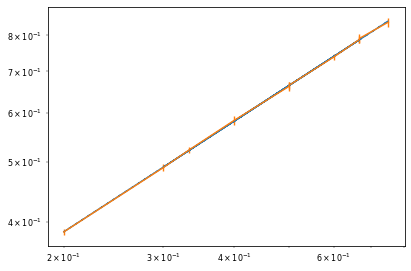

In [206]:
plt.plot(htofit, model(fit.values),'--')
plt.errorbar(np.asarray(hr)[:stop], np.asarray(resc)[:stop,0], np.asarray(resc)[:stop,1].flatten())
plt.xscale('log')
plt.yscale('log')

In [127]:
print("z = {} +- {}".format(fit.values[0] / nuc, fit.errors[0] / nuc))

z = 1.472062706260902 +- 0.011554742127457366


In [208]:
np.savetxt(gdir + "rescaling_from_min.txt", np.column_stack([
                htofit,
                rescMean,
                rescErr
            ]))

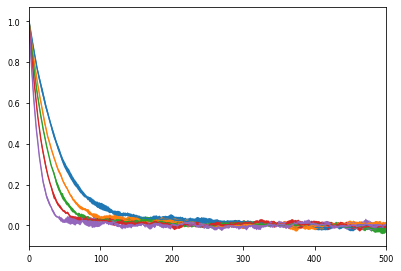

In [207]:
massCutoffsDs = dict()
massCutoffsDs["h0002"] = 250.0
massCutoffsDs["h0003"] = 190.0
massCutoffsDs["h0004"] = 150.0
massCutoffsDs["h0006"] = 120.0
massCutoffsDs["h001"] = 100.0 # set a posteriori to improve the fourier transform.

for h in hkeys[:]:
    data[h].load("OtOttp","dsigma")
    data[h].load("OtOttp_blocks","dsigma")

    plotter.plot(data[h],"OtOttp","dsigma", yfact =  1.0 / np.real(data[h].OtOttp['dsigma'].mean[0]))
    plt.xlim(0,500)
    #plt.yscale('log')
plt.show()

(0.0, 0.15)

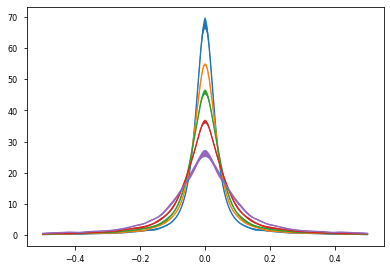

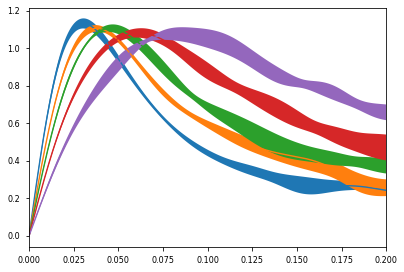

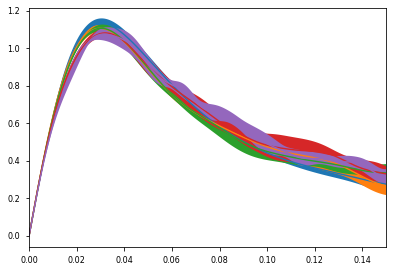

In [145]:
plt.figure(1)
for k in hkeys[::][:]:
    #data[k].computeStatisticalCor('dsigma', omMax=0.5, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)), filterFunc=lambda x : np.exp(-x**2 / massCutoffsDs[h]**2), myTmax = 20000.0)
    plotter.plot(data[k],"OtOttpFourier","dsigma",  yfact = 1.0 / np.real(data[k].OtOttp['dsigma'].mean[0]))
plt.figure(2)

for k in hkeys[::][:]:
    plotter.plot(data[k],"OtOttpFourier","dsigma", yfact = np.abs(data[k].OtOttpFourier_oms["dsigma"])/np.real(data[k].OtOttp['dsigma'].mean[0]))
    data[k].save("OtOttpFourier","dsigma", fmt = "gnuplot",  yfact = 1.0 / np.real(data[k].OtOttp['dsigma'].mean[0]))
    data[k].save("OtOttpFourier","dsigma", yfact = np.abs(data[k].OtOttpFourier_oms["dsigma"])/np.real(data[k].OtOttp['dsigma'].mean[0]), fmt = "gnuplot", tag = "_spectral")
plt.xlim([0,0.2])


plt.figure(3)
for k in hkeys[::][:]:
    plotter.plot(data[k],"OtOttpFourier","dsigma", xfact = rescaling(hs[k], 0.002) , yfact = np.abs(data[k].OtOttpFourier_oms["dsigma"])/np.real(data[k].OtOttp['dsigma'].mean[0]))
    data[k].save("OtOttpFourier","dsigma", xfact = rescaling(hs[k], 0.002) , yfact = np.abs(data[k].OtOttpFourier_oms["dsigma"])/np.real(data[k].OtOttp['dsigma'].mean[0]), fmt = "gnuplot", tag = "_spectral_rescaled")

plt.xlim([0,0.15])

## Results, summary

$$
\begin{array}{|c|c|}
\hline 
& \bf\text{ Simulation parameters}\\
\hline
T=T_c & -4.81100  \\
\hline
H & 0.002, 0.003,0.004,0.006,0.01\\
\hline
z & 0\\
\hline
\chi_0 & 5\\
\hline
\lambda & 4\\
\hline
D & 1/3\\
\hline
\end{array}
$$ 

$$
\begin{array}{|c|c|}
\hline 
& \bf\text{ Fit scaling exponent}\\
\hline
b=\nu_c z &  0.592 \pm 0.005 \\
\hline
z, \text{, with } \nu_c = 0.402432 & 1.47\pm 0.01\\
\hline
\chi^2_{per\ dof} &  0.04 \\
\hline
\end{array}
$$ 



# Pseudocritical transition

In [160]:
dataps=dict()
dataps["z0"] = ConfResults(fn="../data/zcritical_N080_m-0481100_h003000_c00500.h5",thTime=10000,dt=dt, data_format="new", processedDir=processedDataDir, plotDir=gdir)
dataps["z0p944"] = ConfResults(fn="../data/z0p944_N080_m-0473366_h003000_c00500.h5",thTime=10000,dt=dt, data_format="new", processedDir=processedDataDir, plotDir=gdir)
dataps["z1p34899"] = ConfResults(fn="../data/zpseudocritical_N080_m-0470052_h003000_c00500.h5",thTime=10000,dt=dt, data_format="new", processedDir=processedDataDir, plotDir=gdir)

zkeys = ["z0", "z0p944", "z1p34899"]

massCutoffsPS = dict()
massCutoffsPS["z0"] = 2500.0
massCutoffsPS["z0p944"] = 1500.0
massCutoffsPS["z1p34899"] = 1250.0


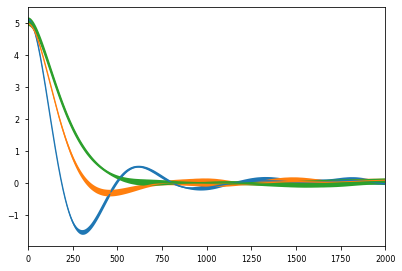

In [165]:
for z in zkeys:
    dataps[z].load("OtOttp","A", direc=processedDataDir)
    dataps[z].load("OtOttp_blocks","A", direc=processedDataDir)

    plotter.plot(dataps[z],"OtOttp","A")
    #plt.ylim(-0.1,0.2)
    plt.xlim(0.,2000)

In [189]:
for z in zkeys:
    dataps[z].save("OtOttp","A", yfact = 1.0 / chi0, fmt = "gnuplot")


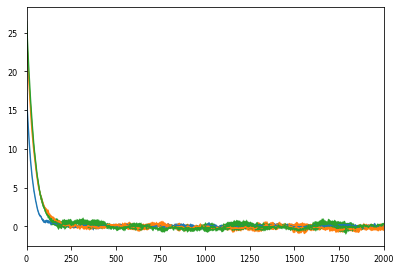

In [161]:
for z in zkeys:
    dataps[z].load("OtOttp","dsigma", direc=processedDataDir)
    dataps[z].load("OtOttp_blocks","dsigma", direc=processedDataDir)

    plotter.plot(dataps[z],"OtOttp","dsigma")
    #plt.ylim(-0.1,0.2)
    plt.xlim(0.,2000)

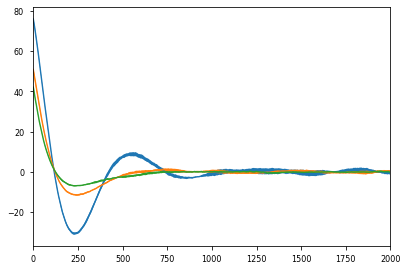

In [164]:
for z in zkeys:
    dataps[z].load("OtOttp","phi", direc=processedDataDir)
    dataps[z].load("OtOttp_blocks","phi", direc=processedDataDir)

    plotter.plot(dataps[z],"OtOttp","phi")
    #plt.ylim(-0.1,0.2)
    plt.xlim(0.,2000)

In [166]:
for z in zkeys:
    dataps[z].computeStatisticalCor('A', omMax=0.1, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)), filterFunc=lambda x : np.exp(-x**2 / massCutoffsPS[z]**2),myTmax = 20000)


/Users/adrien/miniconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:665: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


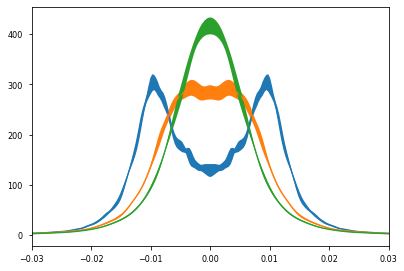

In [188]:
for z in zkeys:
    plotter.plot(dataps[z],"OtOttpFourier","A", yfact = 1.0 / chi0)
    plt.xlim(-0.03,0.03)
    #plt.xlim(0.,2000)

In [190]:
for z in zkeys:
    dataps[z].save("OtOttpFourier","A", yfact = 1.0 / chi0, fmt = "gnuplot")

In [175]:
for z in zkeys:
    dataps[z].computeStatisticalCor('dsigma', omMax=0.3, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)), filterFunc=lambda x : np.exp(-x**2 / massCutoffsPS[z]**2*25),myTmax = 20000)

/Users/adrien/miniconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:665: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


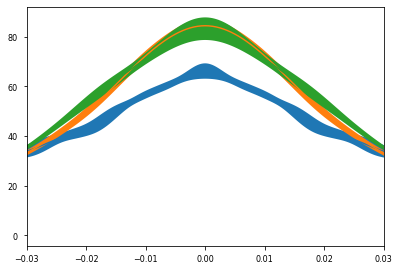

In [176]:
for z in zkeys:
    plotter.plot(dataps[z],"OtOttpFourier","dsigma",yfact = 1.0 / np.real(dataps[z].OtOttp['dsigma'].mean[0]))
    plt.xlim(-0.03,0.03)
    #plt.xlim(0.,2000)

In [178]:
for z in zkeys:
    dataps[z].save("OtOttpFourier","dsigma", yfact = 1.0 / np.real(dataps[z].OtOttp['dsigma'].mean[0]), fmt = "gnuplot")

In [166]:
for z in zkeys:
    dataps[z].computeStatisticalCor('phi', omMax=0.1, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)), filterFunc=lambda x : np.exp(-x**2 / massCutoffsPS[z]**2),myTmax = 20000)

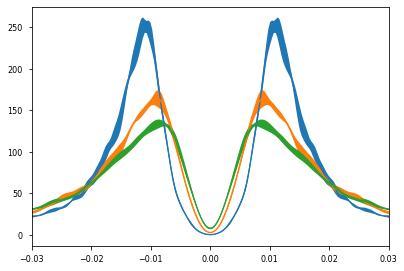

In [181]:
for z in zkeys:
    plotter.plot(dataps[z],"OtOttpFourier","phi",  yfact = 1.0 / np.real(dataps[z].OtOttp['phi'].mean[0]))
    plt.xlim(-0.03,0.03)
    #plt.xlim(0.,2000)

In [182]:
for z in zkeys:
    dataps[z].save("OtOttpFourier","phi", yfact =  1.0 / np.real(dataps[z].OtOttp['phi'].mean[0]), fmt = "gnuplot")

## Parameters

$$
\begin{array}{|c|c|}
\hline 
& \bf\text{ Simulation parameters}\\
\hline
T & -4.811, -4.73366, -4.70052 \\
\hline
H & 0.003\\
\hline
z & 0, 0.94429,  z_{pc} = 1.34899\\
\hline
\chi_0 & 5\\
\hline
\lambda & 4\\
\hline
D & 1/3\\
\hline
\end{array}
$$ 